## Import

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np

## import data

In [43]:
data = pd.read_csv(f'C:/Users/pipatra.NSN-INTRA/Desktop/Anaconda/Projects/21-Sept/Rapido(Like_uber)/data/clean_data.csv')

In [44]:
data.head()

,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,date
0,14626,True,False,False,False,False,False,2018-04-07
1,85490,True,False,False,False,False,False,2018-04-07
2,5408,True,False,False,False,False,False,2018-04-07
3,58940,True,False,False,False,False,False,2018-04-07
4,5408,True,False,False,False,False,False,2018-04-07


- target variable is missing


## Encoding

In [45]:
def preprocessor(df):
    res_df = data.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['is_weekend'] = le.fit_transform(res_df['is_weekend'])
    res_df['is_weekday'] = le.fit_transform(res_df['is_weekday'])
    res_df['is_start_of_week'] = le.fit_transform(res_df['is_start_of_week'])
    res_df['is_end_of_week'] = le.fit_transform(res_df['is_end_of_week'])
    res_df['is_weednesday'] = le.fit_transform(res_df['is_weednesday'])
    res_df['is_holiday'] = le.fit_transform(res_df['is_holiday'])
    return res_df

In [46]:
encoded_data = preprocessor(data)
encoded_data.head(2)

,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,date
0,14626,1,0,0,0,0,0,2018-04-07
1,85490,1,0,0,0,0,0,2018-04-07


In [47]:
encoded_data.set_index(['number'],inplace=True)

In [48]:
encoded_data.drop('date',axis=1,inplace=True)

In [49]:
encoded_data.head()

,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday
number,,,,,,
14626,1,0,0,0,0,0
85490,1,0,0,0,0,0
5408,1,0,0,0,0,0
58940,1,0,0,0,0,0
5408,1,0,0,0,0,0


## WSS Plot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


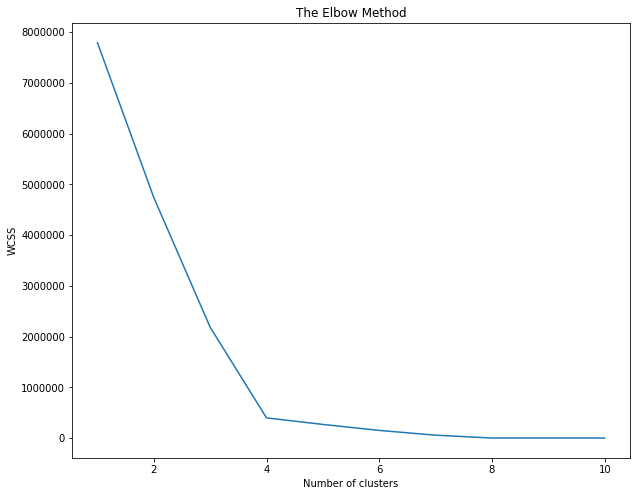

In [50]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(encoded_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering and Cluster Information

In [52]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(encoded_data)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

encoded_data['cluster'] = cluster

#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(encoded_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday
cluster,,,,,,
1.0,0.2,0.8,0.3,0.3,0.2,0.0
2.0,0.2,0.8,0.3,0.3,0.2,0.1
3.0,0.2,0.8,0.3,0.3,0.2,0.0
4.0,0.2,0.8,0.3,0.3,0.2,0.0


In [60]:
encoded_data.head()

,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,cluster
number,,,,,,,
14626,1,0,0,0,0,0,3.0
85490,1,0,0,0,0,0,2.0
5408,1,0,0,0,0,0,3.0
58940,1,0,0,0,0,0,1.0
5408,1,0,0,0,0,0,3.0


In [65]:
encoded_data["is_weekend"].replace(to_replace=1,value=True,inplace=True)

In [67]:
data['cluster'] = cluster

In [68]:
data.head()

,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,date,cluster
0,14626,True,False,False,False,False,False,2018-04-07,3
1,85490,True,False,False,False,False,False,2018-04-07,3
2,5408,True,False,False,False,False,False,2018-04-07,3
3,58940,True,False,False,False,False,False,2018-04-07,3
4,5408,True,False,False,False,False,False,2018-04-07,3


In [69]:
data.to_csv(f'C:/Users/pipatra.NSN-INTRA/Desktop/Anaconda/Projects/21-Sept/Rapido(Like_uber)/data/ML_Data_Rapido_cluster.csv',index=False)

In [ ]:
plt.hist(encoded_data['cluster'],rwidth=0.7)
plt.show()

KeyboardInterrupt: 